# Flight Solutions


# Goals
* ML analysis model that decodes a decade of flight data to predict and manage airline delay.
* Optimize operations, enhance passenger experience.

## Imports

In [1]:
# importing the necessary libraries to run the code
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import wrangle
# from wrangle import 

import explore as e
# # from explore import 
import model as m
# from modeling import 
# from modeling import

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquire data from https://data.world/food/wine-quality
* Octber 2009 and July 2011 are missing the entire months of data.
* Each observation represent an average delay for that day.
* We are measuring the average delays for each day for the last ten years

## Prepare

* Checked for nulls in the data (there were none)
* Checked fi]or duplicates (there were none)
* Filter flight data to only rows with delays.
* Filter the data to to four airlines: Delta, American, Southwest, and United Airlines.
* Filter the data to include only the top 15 Class B Airlines.
* Split data into train, validate and test.
* Outliers have not been removed for this iteration of the project.

In [2]:
# used my wrangle function that acquires, preps and cleans the data
flights = wrangle.pull_airline_data('UA')
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

# splits data train, validate, test
train, validate, test = m.train_test_split(df, '2W')
train_fl, validate_fl, test_fl = m.train_fl_test_fl_split(flights, '2W')

# Data At a Glance

In [3]:
train_fl.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0


In [4]:
# display a snapshot of summary statistics
train.describe()


,average_delay
count,209.000000
mean,57.333545
std,8.007163
min,43.985268
25%,51.858733
50%,55.855312
75%,61.617909
max,101.509765


# Explore

### Is the mean at each airport equal or is there something causing  a difference?


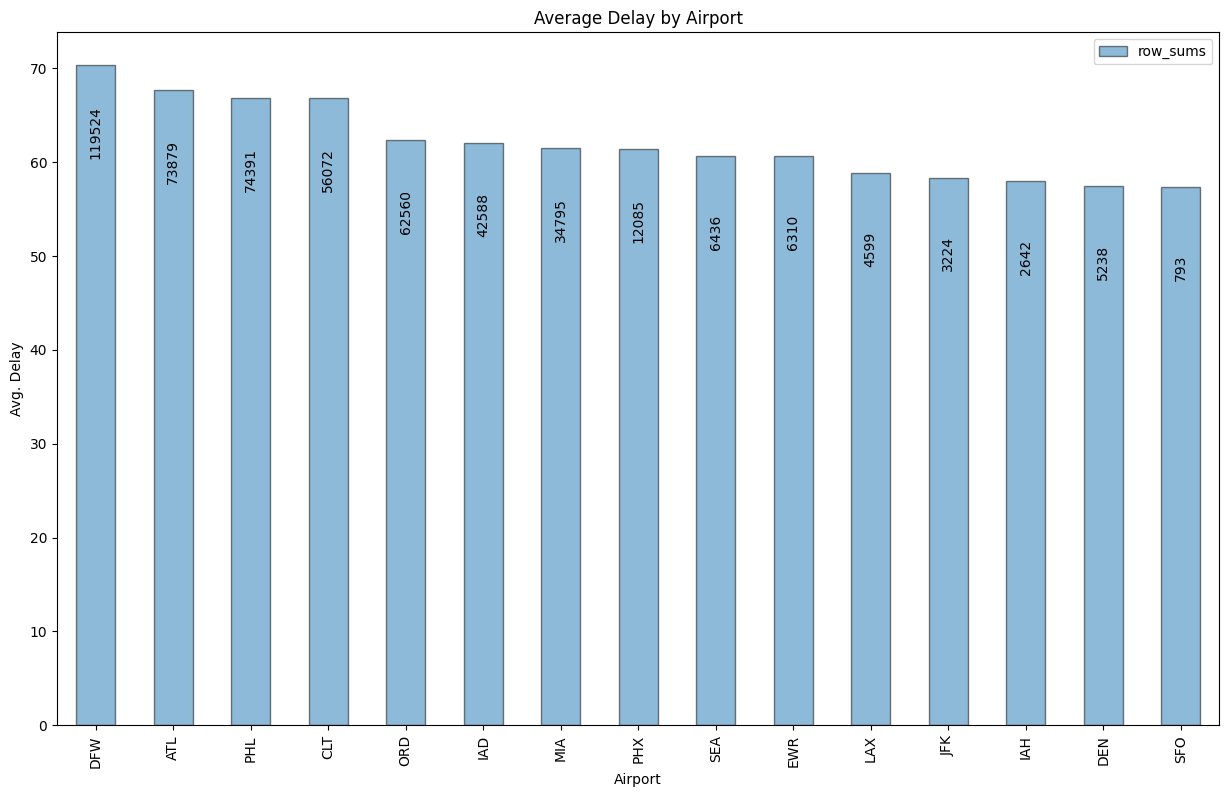

In [5]:
m.means_by_airport(flights, train_fl)

### Takeaways:

* DFW has the highest average of delay and the most flights
* The order of means seems to reflect the flights as well, compared to other airports.
* 

# Stats Testing

## Hypothesis:

H 0 : The average delay in each airport are all the same.

H a : The average delay in each airport are not all the same.

## * How does alocohol affect density?

In [ ]:
print_den_v_alc()

### Takeaways:
* As the density increases the alcohol content drops
* Wines that had a 12 or more in alcohol and socred over 7 in quality are 237
* Red wines have higher alcohol content at a slighty higher density

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between density and alcohol.

H a : There is a linear relationship between density and alcohol.

## Pearson's R-test¶

In [ ]:
x = train.density
y = train.alcohol

α = 0.05

corr, p = stats.pearsonr(x, y)
corr, p

## P-value less than alpha?

In [ ]:
p < α

### We can reject the null hypothesis.


## * Is the average pH higher in red or white wine?

In [ ]:
ph_level()

### Takeaways:

* Red wines have a higher pH on avaerage


# Stats Testing
## Hypothesis:
H
0
: The average pH level in red and white wines is the same.

H
a
: The average pH in is greater in red wines.
## T-test

In [ ]:
# getting the valiues for the red wine pH levels and the average mean for the entire data
t, p = stats.ttest_1samp(train[train['white']==0].pH, train.pH.mean())

print(t, p/2, α)


In [ ]:
bool((1/2 * p < α) and (t > 0))

### We can reject the null hypothesis.


## * How do chlorides affect density?

In [ ]:
print_den_v_chlo()

### Takeaways
* Chlorides can enhance the perception of acidity in wine. This means that the wine may taste more tangy, crisp, and bright
* As the density measure so does our chlorides
* There are a few outliers that do not follow the trend

In [ ]:
model.scatter_2_cluster()

In [ ]:
model.scatter_3_cluster()

In [ ]:
model.scatter_4_cluster()

# Cluster Analysis
* As seen above and below the clusters seem very different.
* For instance above, cluster 0 has less than 50 wines with a quality rating of 5 while cluster 1 has over 500.
* The means an medians seem very different as well. We can see similar results for the three and four feature clusters. 
* However a statistical test is needed to confirm this intuition.

# ANOVA test
* An ANOVA test was done (below) for each of the three clustering runs.
* The null hypothesis for each was that the means for all the clusters are all equal i.e. 
* The alternative hypothesis was that the means are all different.
* An alpha was chosen
* All three clustering algorithms had an alpha well below the threshold and there was sufficient evidence to reject the null hypothesis and conclude the means were different and there is something different between the clusters.
* Therefore we chose to create dummy variables for each cluster and run linear regression that includes these clusters as new features.

---

# Baseline

In [ ]:
wrangle.baseline()

# 2 Feature Clusters

## ANOVA Stat Testing

In [ ]:
model.anova_test_2_feat()

## (OLS) Linear Regression Model Testing

In [ ]:
model.linear_regression_two_features()

---

# 3 Feature  Clusters

## ANOVA Stat Testing

In [ ]:
model.anova_test_3_feat()

## (OLS) Linear Regression Model Testing

In [ ]:
model.linear_regression_three_features()

---

# 4  Feature Clusters

## ANOVA Stat Testing

In [ ]:
model.anova_test_4_feat()

## (OLS) Linear Regression Model Testing

In [ ]:
model.linear_regression_four_features()

# Polynomial

## Plynomial Regression Model Testing

In [ ]:
model.quadratic_model()

---

# Linear Regression on Test

In [ ]:
model.test()


## Modeling Summary

* Clustering based on 2 features (density and alcohol), 3 features (residual sugar, total sulfur dioxide, alcohol), and 4 features (volatile acidity, chlorides, density, alcohol) with k=4 for each produced divergent clusters that performed nearly identically in the final regression models.
* An ANOVA test was performed to show that the clustered groups were in fact different and valuable 
* We kept the clusters in new dummy columns and used them as features to perform Logistic and Polynomial Regression on.
* Our models all performed around with an RMSE around .72 for the Train data, .73 for the validate data.
* Our test RMSE using 2 clusters came out at .75 units of quality
* We beat our baseline based on mean of .87 units by .12 points.

# Conclusion

## Exploration Summary
* As the visuals indicates there seems to be a realtionship with white wine more than red wine
* Wines that had less than 7 in residual sugar and socred over 7 in quality are 466
* As the density increases the alcohol content drops
* Wines that had a 12 or more in alcohol and socred over 7 in quality are 237
* Red wines have a higher pH on avaerage
* Chlorides can enhance the perception of acidity in wine. This means that the wine may taste more tangy, crisp, and bright


## Modeling
* The final model marginally outperformed baseline. Possible reasons include:

We used all the features and we did not correct for multicolinearity for this mvp.
For future models a more careful selection of less features in the linear regression would be helpful.

## Recommendations
* In a future model, consider dropping or combining features through feature engineering in order to reduce multicolinearity issues.  For example total sulfur dioxide and free sulfur dioxide do not both need to be in the model.  Also Alcohol and density are highly correlated as is residual sugar.  
* Reducing the total number of columns may help in creating a better linear regression.
* Classification also might provide a better result.

## Next Steps
* Next steps include reevaluating the efficacy of the clustering all together.  If it shows a better result with different features, then we can hone in and narrow our focus with feature engineering where we combine correlated features and drop columns that do not add to our model.  
* Perhaps also there are differing determinants of quality between red and white wine and "manually clustering" the two might be an interesting to explore what features are in fact different between the two populations and if that has a differential impact of quality vs predicted quality.